In [ ]:
# Content
# The dataset contains several parameters which are considered important during the application for Masters Programs.
# The parameters included are :

# GRE Scores ( out of 340 )
# TOEFL Scores ( out of 120 )
# University Rating ( out of 5 )
# Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
# Undergraduate GPA ( out of 10 )
# Research Experience ( either 0 or 1 )
# Chance of Admit ( ranging from 0 to 1 )
# Acknowledgements
# This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
# The dataset is owned by Mohan S Acharya.

# Inspiration
# This dataset was built with the purpose of helping students in shortlisting universities with their profiles. 
#The predicted output gives them a fair idea about their chances for a particular university.

# Citation
# Please cite the following if you are interested in using the dataset :
# Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

# I would like to thank all of you for contributing to this dataset through discussions and questions. 
#I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import *
import math as m
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
data.shape

(400, 9)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [34]:
data.drop(columns=['Serial No.'], inplace=True)


In [38]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


<AxesSubplot:xlabel='University Rating', ylabel='count'>

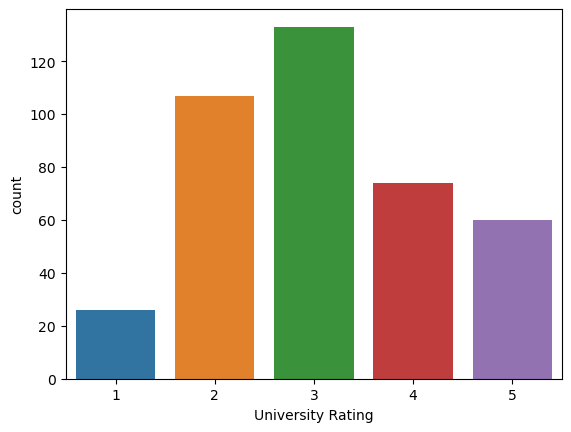

In [39]:
sns.countplot(data['University Rating'])

# insights

### university 3 has the highest numer of rating count followed y 2 and the least rating is for the university 1

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit '>

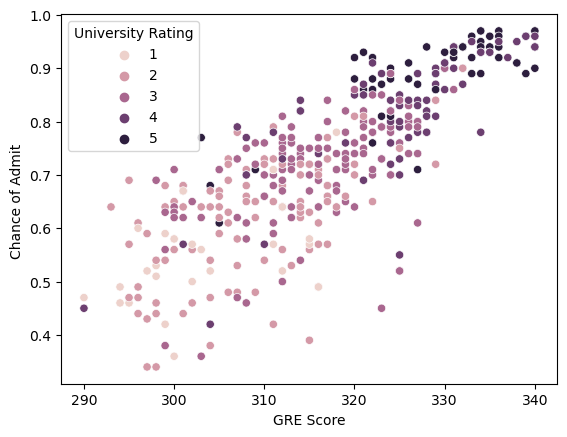

In [46]:
sns.scatterplot(x=data['GRE Score'],y=data['Chance of Admit '],hue=data['University Rating'],data=data)

In [48]:
grp=data.groupby(by='University Rating').agg(AvgGRE=('GRE Score','mean'),
                                            AvgTOFEL=('TOEFL Score','mean'),
                                            AvgCGPA=( 'CGPA','mean'),
                                            AvgAdmit=('Chance of Admit ','mean'))
grp

,AvgGRE,AvgTOFEL,AvgCGPA,AvgAdmit
University Rating,,,,
1,303.153846,99.076923,7.745769,0.548077
2,309.177570,103.523364,8.183738,0.625981
3,315.954887,106.887218,8.552256,0.711880
4,324.824324,111.824324,9.021622,0.818108
5,328.333333,113.666667,9.291167,0.888167


In [ ]:
# Insights

## there is positive relation among the AVG gre, AVg TOEFL and Avg cgpa

In [52]:
x=data[(data['Chance of Admit ']>=0.9)&(data['University Rating']>=4)]
x.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.0,55.000000
mean,333.327273,116.272727,4.636364,4.563636,4.436364,9.511818,1.0,0.933455
std,5.153404,2.711119,0.485479,0.462026,0.527525,0.205967,0.0,0.020925
min,320.000000,110.000000,4.000000,3.000000,3.000000,9.160000,1.0,0.900000
25%,331.000000,115.000000,4.000000,4.500000,4.000000,9.360000,1.0,0.920000
50%,334.000000,116.000000,5.000000,4.500000,4.500000,9.470000,1.0,0.930000
75%,337.500000,118.500000,5.000000,5.000000,5.000000,9.660000,1.0,0.950000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.0,0.970000


<AxesSubplot:>

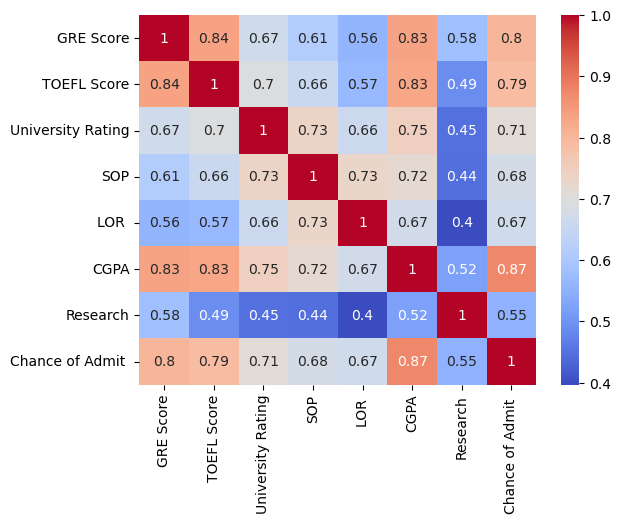

In [53]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [4]:
x=data.drop(columns=['Chance of Admit '])
y=data['Chance of Admit ']

In [5]:
std = preprocessing.StandardScaler().fit_transform(x)

# Pca for handle multicolinearity in model 

In [6]:
pca=sk.decomposition.PCA(n_components=6).fit_transform(std)
pca.shape

(400, 6)

In [64]:
data1=pd.DataFrame(pca)

<AxesSubplot:>

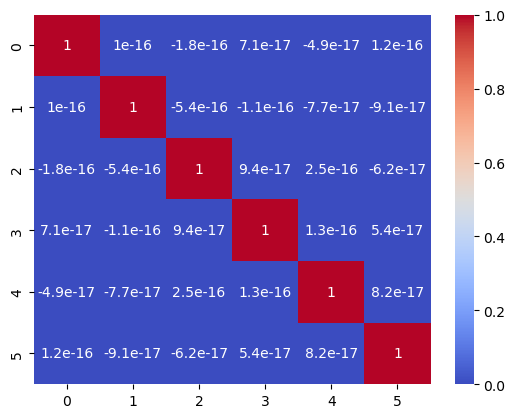

In [65]:
sns.heatmap(data1.corr(),annot=True,cmap='coolwarm')

In [23]:
x_train,x_test,y_train,y_test=sk.model_selection.train_test_split(pca,y,test_size=0.2,random_state=17)

In [33]:
from sklearn.metrics import r2_score,mean_squared_error

In [9]:
train=sk.linear_model.LinearRegression().fit(x_train,y_train)
y_pred=train.predict(x_train)
q=r2_score(y_train,y_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train,y_pred))}')

R-square value for train is 0.8033646110167718
RMSE value for train is 0.06129198003664723


# Adj R2

In [73]:
n=len(y_train)
k=std.shape[1]
adj_r2=1-((1-r2_score(y_train,y_pred))*(n-1)/(n-k-1))
print(f'R-square value for train is {adj_r2}')

R-square value for train is 0.7793431839930135


In [74]:
y_test_pred=train.predict(x_test)
q=r2_score(y_test,y_test_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train,y_pred))}')

R-square value for train is 0.8197478163914707
RMSE value for train is 0.06421159232282667


In [75]:
n=len(y_test)
k=std.shape[1]
adj_r2=1-((1-r2_score(y_test,y_test_pred))*(n-1)/(n-k-1))
print(f'R-square value for train is {adj_r2}')

R-square value for train is 0.8022232985406414


# imorting ridge and lasso

In [37]:
from sklearn.linear_model import LassoCV,Lasso
from sklearn.linear_model import RidgeCV,Ridge


# Lasso Regression 

In [26]:
model = LassoCV(cv=10,random_state=10,max_iter=1000).fit(x_train,y_train)
x=model.alpha_


In [36]:
lasso=Lasso(alpha=x).fit(x_train,y_train)
y_pred=lasso.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for test is 0.8240899063915663
RMSE value for test is 0.06602569912862227


# Ridge Regression

In [41]:
model = RidgeCV(cv=10,alphas=(0.01,0.07,0.1,0.5,0.8, 1.0, 5.0,8.0,10.0,13.0,16.0,18.0,21.0,23.0)).fit(x_train,y_train)
x=model.alpha_


In [42]:
ridge=Ridge(alpha=x).fit(x_train,y_train)
y_pred=ridge.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for test is 0.823760628230121
RMSE value for test is 0.06608746550020213


# KNN neighbour regressor

In [43]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knn=KNeighborsRegressor(n_neighbors=15).fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=knn.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.8163837809524952
RMSE value for train is 0.059228172256865136
************************************************************************************
R-square value for test is 0.7927919612150316
RMSE value for test is 0.07165903060094146


In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# grid search cv

In [63]:
param_dist = {'max_depth': [1,2,3,4,5,6,7],
              'min_samples_leaf': [5,7,8,10,11],
              'min_samples_split':[3,5,7,8,9,10,11,12,13,15,21,24],
              'criterion': ['squared_error']}
search= sk.model_selection.GridSearchCV(dt,cv=10,param_grid=param_dist,n_jobs=1).fit(x_train,y_train)
search.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 9}

# DecisionTreeRegressor

In [64]:
dt=DecisionTreeRegressor(criterion= 'squared_error',max_depth=6,min_samples_leaf=7,min_samples_split=9).fit(x_train,y_train)
y_train_pred=dt.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=dt.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.8917808872137252
RMSE value for train is 0.04546998335261661
************************************************************************************
R-square value for test is 0.8035459815175306
RMSE value for test is 0.06977471753906568


# Random Forest Regressor

In [68]:
param_dist = {'max_depth': [5,6,7,8,9,12,16,19,23,25,29],
              'bootstrap': [True],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'max_leaf_nodes':[3,5,7,9,13,17,19,23,27],
              'n_estimators':[5,10,15,20,23,25,27],
              'criterion': ['squared_error']
             }
search= sk.model_selection.GridSearchCV(rf,cv=10,param_grid=param_dist,n_jobs=1).fit(x_train,y_train)
search.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 23,
 'n_estimators': 15}

In [153]:
rf=RandomForestRegressor(criterion= 'squared_error',max_depth=6,min_samples_leaf=7,min_samples_split=9,max_leaf_nodes=33,n_estimators=15,max_features='auto',bootstrap=True,oob_score=True,warm_start=True).fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=rf.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.8890652263429779
RMSE value for train is 0.04603696251159554
************************************************************************************
R-square value for test is 0.8415808370328255
RMSE value for test is 0.06265727248655845


# SVR Regessor 

In [87]:
svr=SVR(kernel='rbf').fit(x_train,y_train)
y_train_pred=svr.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=svr.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.7992237842954255
RMSE value for train is 0.06193397333065604
************************************************************************************
R-square value for test is 0.7351702878934274
RMSE value for test is 0.0810123038406394


# GradientBoostingRegressor

In [103]:
gdb=GradientBoostingRegressor(min_samples_split=21,alpha=0.5,max_depth=15).fit(x_train,y_train)
y_train_pred=gdb.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=gdb.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.9997955320001781
RMSE value for train is 0.001976448420107781
************************************************************************************
R-square value for test is 0.8286825014597802
RMSE value for test is 0.065158111862454


# ADA Boost Regressor

In [136]:
ada=AdaBoostRegressor(n_estimators=29,learning_rate=0.009).fit(x_train,y_train)
y_train_pred=ada.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=ada.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.8373018411395199
RMSE value for train is 0.055752472199845485
************************************************************************************
R-square value for test is 0.832907107595767
RMSE value for test is 0.0643497134123838


# xg boost

In [137]:
xg=XGBRegressor().fit(x_train,y_train)
y_train_pred=xg.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=xg.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.9999291850684028
RMSE value for train is 0.0011631486758926328
************************************************************************************
R-square value for test is 0.8601186687912582
RMSE value for test is 0.05887724864013126


# Importing Voting regressor to calculate the mean of all the regressor model accuracy

In [138]:
from sklearn.ensemble import VotingRegressor

In [151]:
vr=VotingRegressor([('XGB',xg),('ADA',ada),('GBR',gdb),('SVR',svr),('RF',rf),('DT',dt)],weights=[3,3,1,1,3,1]).fit(x_train,y_train)
y_train_pred=vr.predict(x_train)
q=r2_score(y_train,y_train_pred)
print(f'R-square value for train is {q}')
print(f'RMSE value for train is {m.sqrt(mean_squared_error(y_train_pred,y_train))}')

print('************************************************************************************')

y_pred=vr.predict(x_test)
q=r2_score(y_test,y_pred)
print(f'R-square value for test is {q}')
print(f'RMSE value for test is {m.sqrt(mean_squared_error(y_pred,y_test))}')

R-square value for train is 0.9423410074414102
RMSE value for train is 0.033189929935822746
************************************************************************************
R-square value for test is 0.8490204757900965
RMSE value for test is 0.061168334395744046
